<h1 style="color:darkred; font-family:candara; font-size:400%; text-align:center;"> 
    COVID-19
</h1>

***


This notebook will study my own questions about the coronavirus phenomenon that has alarmed the world and that has waken us up about the implication of pandemias in a globalised world. 
[In this link](https://systems.jhu.edu/research/public-health/ncov/) you can find a nice review of how these events have developed since its first appearance.

I think (and hope) that the world won't devolve into xenofobic, rigidly separate countries with hard borders, hence after this analysis, the most important message to take home is that nations should act more tightly and in a synchronised manner when the next pandemia rises.

Whilst looking at the great map done by the [John Hopkins University](https://systems.jhu.edu/research/public-health/ncov/), I was left with so many more questions than answers about many details of this illness and how it is affecting each country. 
Hopefully some indagation could help understand better the spread and the impact of this disease.
<br><br>
<a href="https://www.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6">
    <img src="images/COVID-19_global-cases.png" alt="COVID-19" width="650" >
</a>

*Source: Dong E, Du H, Gardner L. [An interactive web-based dashboard to track COVID-19 in real time](https://www.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6). Lancet Infect Dis; published online Feb 19, and retrieved Apr 1, 2020. https://doi.org/10.1016/S1473-3099(20)30120-1.*

Hopefully some indagation could help understand better the spread and the impact of this disease.

The data used here was taken from the [**John Hopkins University data on GitHub**](https://github.com/CSSEGISandData/COVID-19/tree/master/archived_data), which in turn is compiled from different sources. This database is updated once a day.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

In [2]:
urlconfirmed = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
urldeaths = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
urlrecovered = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

df = pd.read_csv(urlconfirmed, error_bad_lines=False)
deaths = pd.read_csv(urldeaths, error_bad_lines=False)
recov = pd.read_csv(urlrecovered, error_bad_lines=False)

In [3]:
df = df.rename(columns={'Province/State':'provincestate', 'Country/Region':'countryregion', 'Lat':'lat', 'Long':'lon'}) #
recov = recov.rename(columns={'Province/State':'provincestate', 'Country/Region':'countryregion', 'Lat':'lat', 'Long':'lon'}) #
deaths = deaths.rename(columns={'Province/State':'provincestate', 'Country/Region':'countryregion', 'Lat':'lat', 'Long':'lon'}) #

latlon = df[['countryregion', 'lat', 'lon']] # We have to save lat and long 

# I am not interested in regions of the US. which seems to be the only one with meaningful province/state
df = df.groupby('countryregion', as_index=False).sum()
recov = recov.groupby('countryregion', as_index=False).sum()
deaths = deaths.groupby('countryregion', as_index=False).sum()


One of the most important things to keep track of is how the number of cases is growing.  
To do so we only have to get the difference of known cases.
The definition of growth is given by
$$g_{i+1,i} = \frac{\Delta_{i+1,i}}{\Delta_{i,i-1}},$$

where $\Delta_{i+1,i}$ is the amount of new cases of day $i+1$. 

Since China differs so much in time and behaviour from the rest of the world until now, I'll leave it out of the next graph.

C:\Users\cuspi\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


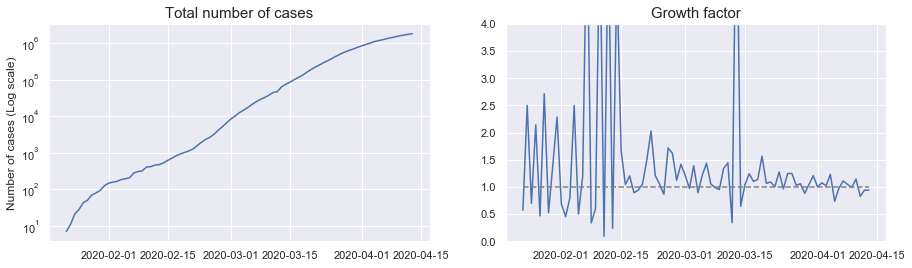

In [4]:
outchina = df[df.countryregion!='China']

# plt.plot(outchina.sum()[3:].tolist() )
# plt.yscale('log')

fig, ax = plt.subplots(1,2,figsize=(15,4))

prev = 0
l=[]
for i in outchina.sum()[3:].tolist():
    l.append(i-prev)
    prev=i
    
growth_dates = pd.to_datetime(outchina.columns[4:]);
growth=[]

for i in range(len(l[:-1])):
    growth.append( l[i+1]/l[i] )
ax[1].plot(growth_dates, growth);
ax[1].set_title('Growth factor', size=15)
ax[1].plot([growth_dates[0], growth_dates[-1] ],[1, 1],  color='grey', linestyle='--')
ax[1].set_ylim(ymax = 4, ymin =0);


ax[0].plot( pd.to_datetime(outchina.columns[3:]), outchina.sum()[3:] );
ax[0].set_yscale('log')
ax[0].set_title('Total number of cases', size=15)
ax[0].set_ylabel('Number of cases (Log scale)');
# plt.yscale('log')

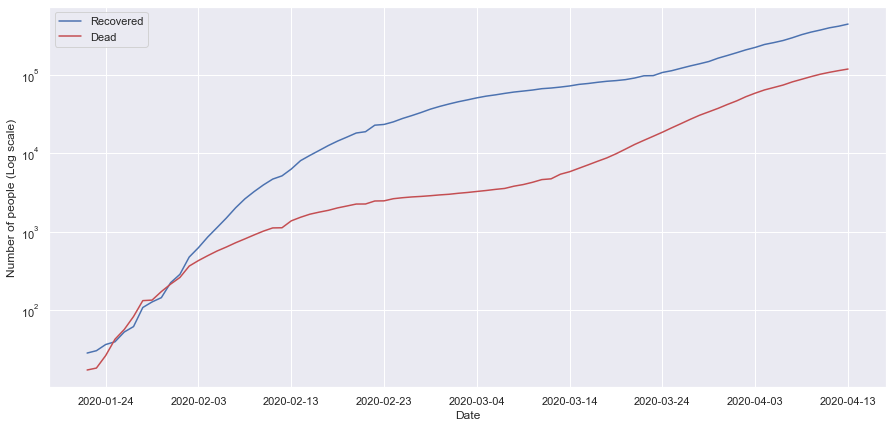

In [5]:
dates_death = pd.to_datetime( df.columns[3:])
dates_recov = pd.to_datetime( recov.columns[3:])

fig = plt.figure(figsize=(15,7))
sns.lineplot(x=dates_recov, y= recov.sum()[3:].astype(float), label='Recovered' );
sns.lineplot(x=dates_death, y=deaths.sum()[3:].astype(float), color='r' , label='Dead');
plt.yscale('log')

plt.ylabel('Number of people (Log scale)')
plt.xlabel('Date')

#Show some ticks
x_ticks = df.columns[:3:-10].tolist()
x_ticks
plt.xticks(x_ticks);

Currently there is some tendency to compare the number of people who died with the number of people who currently have the disease but this is nonsense. Comparing these groups would be like comparing the number of people who didn't win the lottery last month with the number of people who bought a ticket this month.

To know the real current risk of death we *must* compare the number of people who **already went through the illness** and *survived* with the number of people who *died* from the disease.

First let's get the total number of people who have had the illness:



 The current death percentage worlwide is 21.03% 


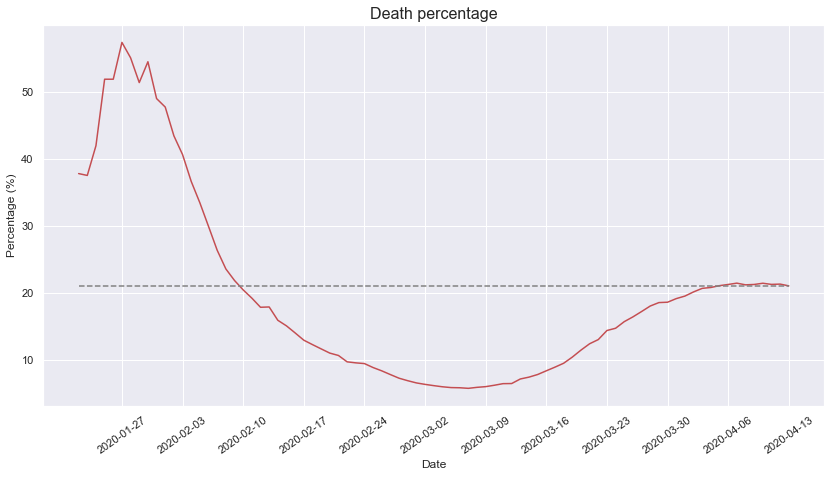

In [6]:
if  dates_death[-1]  > dates_recov[-1]:
    dates = dates_recov
else:
    dates = dates_death

done = deaths.sum()[3:(len(dates)+3)] + recov.sum()[3:(len(dates)+3)]
# sns.lineplot(x=dates, y=done.astype(float));

fig = plt.figure(figsize=(14,7))
death_percentages = 100 *(deaths.sum()[3:(len(dates)+3)].astype(float)/done.astype(float) )

print('\n\n The current death percentage worlwide is {:.2f}% '.format(death_percentages[-1]) )

sns.lineplot(x=dates, y=death_percentages[:len(dates)] , color='r')
plt.plot([dates[0], dates[-1] ],[death_percentages[-1], death_percentages[-1] ],  color='grey', linestyle='--')

plt.xlabel('Date')
plt.ylabel('Percentage (%)')
plt.title('Death percentage', size=16)
#Show some ticks
x_ticks = df.columns[:3:-7].tolist()
plt.xticks(x_ticks, rotation=35);

This plot makes sense. At the beginning the percentage was so high because the first cases reported were the ones were people died. Later on, many tests were taken (thus raising the number of people to have had the disease and survived) and people were being treated properly. We might say that at the beginning this curve is not that helpful but later on, specially towards the end of the plot, this is a good measure of how many people diagnosed with the illness survives.  

I think this figure is one of the most important things to be considering these days: It tells us that when someone is diagnosed with COVID-19, the outcome seems dreadful. In some countries the outcome is almost a flip coin.
Notice how this percentage is completely different to that usually reported by the media! In many sources the number of dead people is usually compared to the **active cases**. That percentage sometimes **is being compared to that of flu!**

It is good to see that nowadays this curve is now descending.

### New cases worldwide

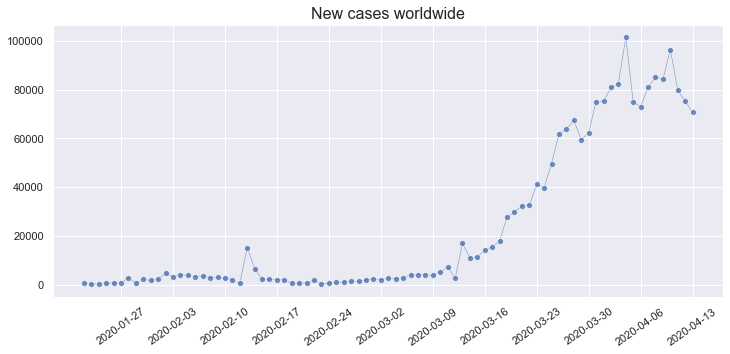

In [7]:
prev = 0
l=[]
for i in df.sum()[3:].tolist():
    l.append(i-prev)
    prev=i

fig = plt.figure(figsize=(12,5))
sns.lineplot(x=dates, y= l, marker='o', linewidth=0.5, alpha=.8);
plt.title('New cases worldwide', size=16)
plt.xticks(x_ticks, rotation=35);

###  What about the weekends?

In the following plot and data, 0 is Monday and 6 is Sunday.

Take into account that the last day these number numbers were refreshed was on a Mon


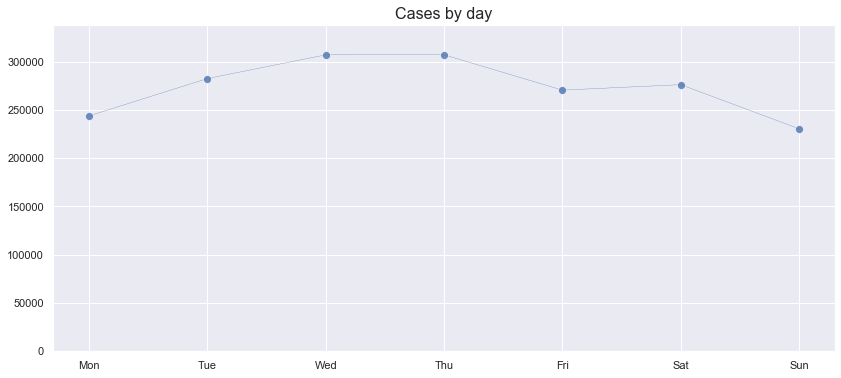

In [8]:
weekdays = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
print('Take into account that the last day these number numbers were refreshed was on a {}'.format(weekdays[pd.to_datetime(df.columns[-1]).dayofweek] ))

prev = 0
newcases=[]
totalcases = df.sum()[3:].astype(float)
for i in totalcases.tolist():
    newcases.append(i-prev)
    prev=i
casesbyday = [0 for i in range(7)]
for i, totday in enumerate(casesbyday):
    casesbyday[i] = np.sum(newcases[i::7])

fig = plt.figure(figsize=(14,6))
sns.lineplot(x=[i for i in range(7)], y=casesbyday, alpha=.8, marker='o', markersize=8, linewidth=.35)

plt.title('Cases by day', size = 16)
plt.xticks([i for i in range(7)], weekdays)
plt.ylim(ymin=0, ymax = (1.1 * np.max(casesbyday) ) );
# sns.lineplot(x=dayofweek, y=newcases  );

It does seem that **over the weekends there are less cases reported**. 

## Analyses by country

In [9]:
#To search 
df[df.countryregion.str.contains('South')]

,countryregion,lat,lon,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20
90,"Korea, South",36.0000,128.0000,1,1,2,2,3,4,4,...,10156,10237,10284,10331,10384,10423,10450,10480,10512,10537
154,South Africa,-30.5595,22.9375,0,0,0,0,0,0,0,...,1585,1655,1686,1749,1845,1934,2003,2028,2173,2272
155,South Sudan,6.8770,31.3070,0,0,0,0,0,0,0,...,0,1,1,2,2,3,4,4,4,4


In [10]:
def plot_dvsr(country, scale='log'):
    '''This functions gives back a plot of the total number of death and recovered people of a specific country
    country (str): Country we're interested in
    scale   (str): Scale of the y axis. Most common are either 'log' or 'linear'
    '''

    fig = plt.figure(figsize=(14,7))
    sns.lineplot(x=dates, y= recov[recov.countryregion==country].sum()[3:(len(dates)+3)].astype(float), label='Recovered' );
    sns.lineplot(x=dates, y=deaths[deaths.countryregion==country].sum()[3:(len(dates)+3)].astype(float), color='r' , label='Dead');
    plt.yscale(scale)

    plt.ylabel('Number of people (Log scale)')
    plt.xlabel('Date')
    plt.title('Totals in {}'.format(country), size=16)
    
    #Show some ticks
    x_ticks = df.columns[:3:-10].tolist()
    x_ticks
    plt.xticks(x_ticks);
    death_rateC = 100*deaths[deaths.countryregion==country].iloc[:,-1] / (recov[recov.countryregion==country].iloc[:,-1] + deaths[deaths.countryregion==country].iloc[:,-1] )
    print('\n The total number of deaths in {} is {:.2f} \n The death rate of confirmed cases today in {} is {:.2f}'.format(country, deaths[deaths.countryregion==country].sum()[3:(len(dates)+3)].astype(float)[-1] ,country, death_rateC.values[0] ))

We now make a list of the countries we are interested in:

In [11]:
countries = ['Italy','Mexico', 'Canada', 'Netherlands', 'Germany', 'United Kingdom', 'China', 'Japan', 'US', 'Indonesia', 'Spain', 'Korea, South', 'Brazil', 'Argentina', 'Chile', 'Venezuela']

# Interactive imports:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [12]:
interact(plot_dvsr , country=countries, scale=['log','linear'] );

interactive(children=(Dropdown(description='country', options=('Italy', 'Mexico', 'Canada', 'Netherlands', 'Ge…

Japan seems to be the country that responded the best all along.

In [13]:
def plot_trend_growth(country, scale='log'):
    '''This functions returns a plot of the death and recovered people of a specific country
    country (str): Country we're interested in
    scale   (str): Scale of the y axis. Most common are either 'log' or 'linear'
    '''

    fig, axes = plt.subplots(2,1,figsize=(15,10))
    
    sns.lineplot(x=pd.to_datetime(df.columns[3:]) , y= df[df.countryregion==country].sum()[3:].astype(float), color='b', ax=axes[0] );
    axes[0].set_yscale(scale)
    axes[0].set_ylabel('Number of cases ({} scale)'.format(scale))
    axes[0].set_xlabel('Date')
    axes[0].set_title('Total number of cases in {}'.format(country), size=16)
    
    #Show some ticks
    x_ticks = df.columns[:3:-15].tolist()
    x_ticks
    axes[0].set_xticks(x_ticks);
    
    #======================Growth===================
    prev = 0
    l=[]
    for i in df[df.countryregion==country].sum()[3:].tolist():
        l.append(i-prev)
        prev=i

    growth_dates = pd.to_datetime(df[df.countryregion==country].columns[4:]);
    growth=[]
    for i in range(len(l[:-1])):
        if l[i]>0:
            growth.append( l[i+1]/l[i] )
        else:
            growth.append(0)
    
    sns.lineplot(x=growth_dates , y=growth, ax=axes[1] );
    axes[1].set_xlabel('Date')
    axes[1].set_title('Growth factor in {}'.format(country), size=16)
    axes[1].set_ylim(ymax = 5, ymin =0)
    
    #Show some ticks
    axes[1].set_xticks(x_ticks);
    
    print('\n The total number of cases in {} is {:.0f} '.format(country, df[df.countryregion==country].sum()[3:(len(dates)+3)].astype(float)[-1] ))
    
interact(plot_trend_growth , country=countries, scale=['log','linear'] );

interactive(children=(Dropdown(description='country', options=('Italy', 'Mexico', 'Canada', 'Netherlands', 'Ge…

### New cases and new deaths by country

In [14]:
def plot_newcases(country, scale='log'):
    '''This functions gives back a plot of new cases and new deaths of a specific country
    country (str): Country we're interested in
    scale   (str): Scale of the y axis. Most common are either 'log' or 'linear'
    '''
    # New cases
    prev = 0
    newcases=[]
    for i in df[df.countryregion==country].sum()[3:].tolist():
        newcases.append(i-prev)
        prev=i
    
    fig = plt.figure(figsize=(14,7))
    sns.lineplot(x=dates, y= newcases, marker='o',markersize=8 , linewidth=0.2, alpha=.8);
    plt.title('New cases worldwide', size=16)
    plt.xticks(x_ticks, rotation=35);
    
    
    #New deaths
    prevd = 0
    newd=[]
    for i in deaths[deaths.countryregion==country].sum()[3:].tolist():
        newd.append(i-prevd)
        prevd=i
        
    sns.lineplot(x=dates, y= newd, marker='o',markersize=8, linewidth=0.2, alpha=.9, color='r');
    plt.title('New cases in {}'.format(country), size=16)    
    
    plt.yscale(scale)
    plt.ylabel('{} scale'.format(scale))

#     fig = plt.figure(figsize=(14,7))
#     sns.lineplot(x=dates, y= recov[recov.countryregion==country].sum()[3:(len(dates)+3)].astype(float), label='Recovered' );
#     sns.lineplot(x=dates, y=deaths[deaths.countryregion==country].sum()[3:(len(dates)+3)].astype(float), color='r' , label='Dead');
#     

#     plt.ylabel('Number of people (Log scale)')
#     plt.xlabel('Date')
#     plt.title('{}'.format(country), size=16)
    
#     #Show some ticks
#     x_ticks = df.columns[:3:-10].tolist()
#     x_ticks
#     plt.xticks(x_ticks);

interact(plot_newcases , country=countries, scale=['log','linear'] );

interactive(children=(Dropdown(description='country', options=('Italy', 'Mexico', 'Canada', 'Netherlands', 'Ge…

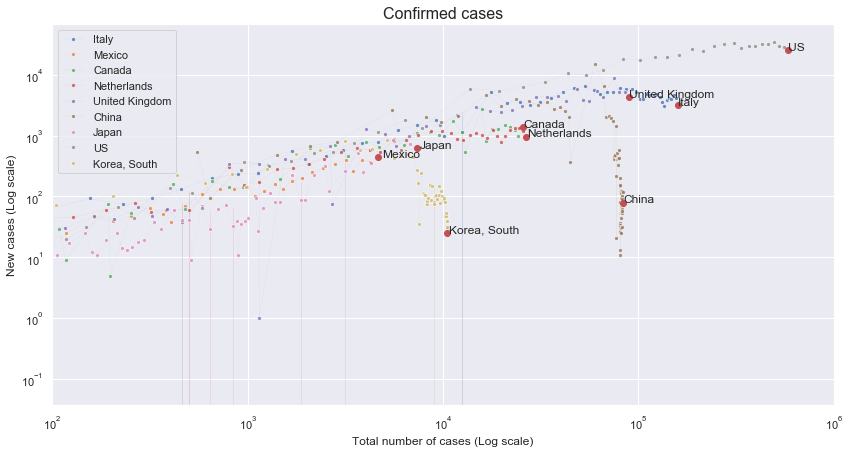

In [15]:
# Plot comparing several countries
fig = plt.figure(figsize=(14,7))
ax = fig.add_subplot(111)
for country in ['Italy','Mexico', 'Canada', 'Netherlands', 'United Kingdom', 'China', 'Japan', 'US', 'Korea, South']:
    prev = 0
    newcases=[]
    for i in df[df.countryregion==country].sum()[3:].tolist():
        newcases.append(i-prev)
        prev=i

    x =  df[df.countryregion==country].sum()[3:].astype(float)
    y = newcases

    sns.lineplot(x=x, y= y, marker='.',markersize=8 , linewidth=0.05, alpha=.8, label=country);
#     plt.annotate(country, (x[-1],y[-1]), textcoords="offset points", # how to position the text
#                  xytext=(17,5), size=14 ) # distance from text to points (x,y) 
    plt.scatter(x=x[-1], y= y[-1], marker='o',  color='r', zorder=10);
    ax.text(x[-1]+200,y[-1], country, size=12 , zorder=11);
    
                

plt.xlabel('Total number of cases (Log scale)')
plt.ylabel('New cases (Log scale)')
plt.title('Confirmed cases', size=16)    

plt.xlim(xmin=100, xmax = 10e5)
plt.yscale('log')
plt.xscale('log')

In [16]:
def plot_newcasesVStotcases(country):
    '''This functions gives back a plot of new cases and new deaths of a specific country
    country (str): Country we're interested in
    scale   (str): Scale of the y axis. Most common are either 'log' or 'linear'
    '''
    fig = plt.figure(figsize=(14,7))
    prev = 0
    newcases=[]
    for i in df[df.countryregion==country].sum()[3:].tolist():
        newcases.append(i-prev)
        prev=i

    x =  df[df.countryregion==country].sum()[3:].astype(float)
    y = newcases

    sns.lineplot(x=x, y= y, marker='.',markersize=8 , linewidth=0.05, alpha=.8);
#     plt.annotate(country, (x[-1],y[-1]), textcoords="offset points", # how to position the text
#                  xytext=(17,5), size=14 ) # distance from text to points (x,y) 
    plt.scatter(x=x[-1], y= y[-1], s=70, color='r', zorder=10);
    ax.text(x[-1]+200,y[-1], country, size=12 , zorder=11);

    plt.xlabel('Total number of cases (Log scale)')
    plt.ylabel('New cases (Log scale)')
    plt.title('Confirmed cases in {}'.format(country), size=16)    
    plt.xlim(xmin=100, xmax = 10e5)
    plt.ylim(ymin=10, ymax=10e4)
    plt.yscale('log')
    plt.xscale('log')
   
    
interact(plot_newcasesVStotcases , country=countries, scale=['log','linear'] );

interactive(children=(Dropdown(description='country', options=('Italy', 'Mexico', 'Canada', 'Netherlands', 'Ge…

# Predictions

Let's try to predict the new amount of new cases worlwide

In [17]:
from datetime import timedelta, date
future=[]
for i in range(0, 10):
    future.append(date.today() + timedelta(days=i) )
future = pd.to_datetime(future)
#dates #+ timedelta(days=1)  # To add one day to all entries in 'dates'

In [18]:
# To append future to dates
dates_predict = pd.to_datetime(dates.tolist() + future.tolist());

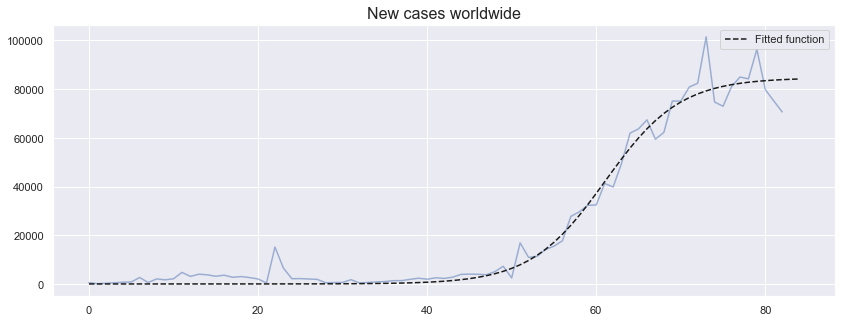

In [37]:
from scipy.optimize import curve_fit
plt.figure(figsize=(14,5))

prev = 0
newcases=[]
for i in df.sum()[3:].tolist():
    newcases.append(i-prev)
    prev=i


x_data, y_data = np.arange(len(np.array(dates.values))), np.array(newcases)
plt.plot(x_data, y_data, color='b', alpha=.5)

def test_func(x, a, b, c):
#     return x*np.exp(a*(1. - x/b)) # Ricker's model
#     return a * np.exp(b * x) # Simple exponential
    return a* (1.0/(1 + np.exp(-b * x+c) ) )# Sigmoid logistic
#     return x


params, params_covariance = curve_fit(test_func, x_data, y_data, p0=[0, 0.01, .01])
plt.title('New cases worldwide', size=16)
# plt.ylim(ymin=-1000, ymax=1.15*np.max(newcases))
x_pred = np.arange(len(np.array(dates.values))+2)
plt.plot(x_pred, test_func(x_pred, params[0], params[1], params[2]), label='Fitted function', color='k', linestyle='--');

# plt.yscale('log')
plt.legend();

We are now in the flattening bit of this sigmoidal logarithmic curve, defined by $$f(x) = a \, \frac{1}{1+ e^{-bx+c}}$$

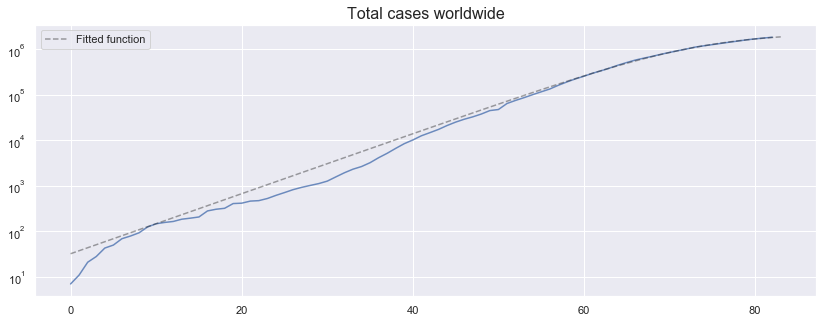

In [40]:
plt.figure(figsize=(14,5))

x_data, y_data = np.arange(len(np.array(dates.values))), np.array(outchina.sum()[3:].values).astype(float)
plt.plot(x_data, y_data, color='b', alpha=.8)

def test_func(x, a, b, c):
#     return x*np.exp(a*(1. - x/b)) # Ricker's model
#     return a * np.exp(b * x) # Simple exponential
    return a* (1.0/(1 + np.exp(-b * x+c) ) )# Sigmoid logistic



params, params_covariance = curve_fit(test_func, x_data, y_data, p0=[0,0,.001])
plt.title('Total cases worldwide', size=16)
# plt.ylim(ymin=-1000, ymax=1.15*np.max(newcases))
ndaysahead = 1
x_pred = np.arange(len(np.array(dates.values)) + ndaysahead )
plt.plot(x_pred, test_func(x_pred, params[0], params[1], params[2]), label='Fitted function', color='k', linestyle='--', alpha=.4);

plt.yscale('log')
plt.legend();


In [41]:
residuals = y_data - test_func(x_data, params[0], params[1], params[2])
ss_res = np.sum(residuals**2)

ss_tot = np.sum((y_data-np.mean(y_data))**2)

r_squared = 1 - (ss_res / ss_tot)
r_squared

0.9997252925030561

Wow, outside of China, the total number of cases behaves quite like an exponential function so far. The value of $R^2$ is .988

In [42]:
import time

date_ahead = dates[-1] + timedelta(days=ndaysahead)  # To add one day to all entries in 'dates'
totcasesww = test_func(x_pred[-1], params[0], params[1], params[2])

print('\n We can see we are still in the exopnential part of this logistic curve. \n It seems like the number total number of cases is expected to be {:.2f} on {}'.format(totcasesww, date_ahead.strftime('%d/%m/%Y') ) ) # Iso Format


 We can see we are still in the exopnential part of this logistic curve. 
 It seems like the number total number of cases is expected to be 1870948.54 on 14/04/2020
